In [155]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
from skimage.transform import radon, rescale
from scipy.interpolate import interp1d

In [42]:
save_here = "C:/Users/tomerf/Desktop/reconstruction_examples_for_master/figures/"

In [105]:
# Create blank image
img_size = 512
phantom = np.zeros((img_size, img_size), dtype=np.uint8)

# Circle parameters
circle_center = (img_size // 2, img_size // 2)
circle_radius = 100
cv2.circle(phantom, circle_center, circle_radius, color=255, thickness=-1)

# Rectangle parameters (placed to the right of the circle)
rect_top_left = (img_size // 2 + 120, img_size // 2 - 160)
rect_bottom_right = (rect_top_left[0] + 60, rect_top_left[1] + 120)
cv2.rectangle(phantom, rect_top_left, rect_bottom_right, color=255, thickness=-1)

# Normalize to float [0,1] for Matplotlib
phantom_norm = phantom.astype(np.float32) / 255.0

TypeError: imshow() missing 1 required positional argument: 'X'

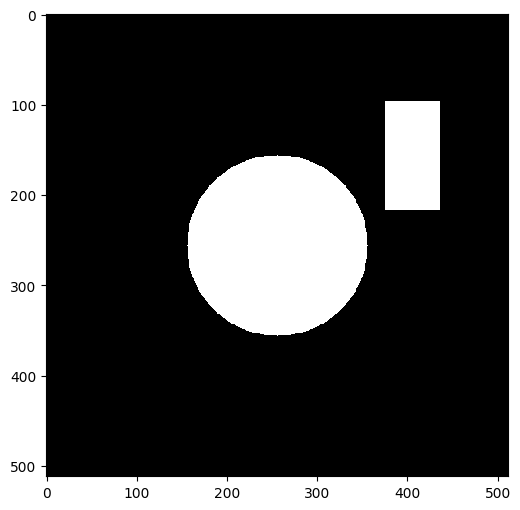

In [131]:
# Save as vector images
plt.figure(figsize=(5, 5))
plt.imshow(phantom_norm, cmap='gray', interpolation='none')
# plt.axis('off')
plt.tight_layout(pad=0)
# plt.savefig(save_here + "phantom_circle_rectangle.svg", format='svg', bbox_inches='tight', pad_inches=0)
# plt.savefig(save_here + "phantom_circle_rectangle.pdf", format='pdf', bbox_inches='tight', pad_inches=0)
plt.imshow()


In [126]:
azi_angles = np.linspace(0,180.0, 360, endpoint=False)
sinogram = radon(phantom_norm, azi_angles)
sinogram.shape

(512, 360)

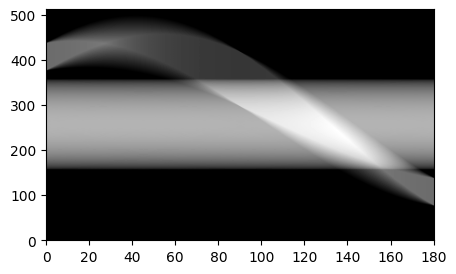

In [133]:
plt.rcdefaults()
plt.style.use('default')

plt.figure(figsize=(5,3), facecolor='white')
plt.imshow(
    sinogram,                        # no transpose here
    cmap='gray',
    aspect='auto',                   # don’t squash vertically
    origin='lower',                  # detector pixel 0 at the bottom
    extent=(0, 180, 0, sinogram.shape[0])  # x-axis 0–180 deg
)
plt.savefig(save_here + "phantom_sinogram.svg", format='svg', bbox_inches='tight', pad_inches=0)
plt.savefig(save_here + "phantom_sinogram.pdf", format='pdf', bbox_inches='tight', pad_inches=0)
plt.show()

In [137]:
angle_45 = np.array([45])
angle_45.shape

(1,)

In [157]:
sinogram_45 = radon(phantom_norm, angle_45)

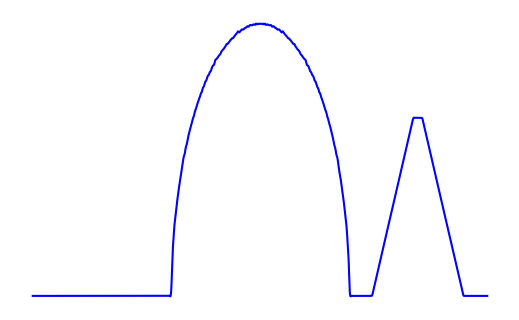

In [161]:
# Assuming sinogram is 2D: (detector_pixels, angles)
sinogram_45 = sinogram[:, 45]  # Get 45° projection (1D)

# Original vector
x = np.arange(len(sinogram_45))
y = sinogram_45

# Interpolation function (cubic is smooth)
interp_func = interp1d(x, y, kind='cubic')

# New, denser x-axis
x_dense = np.linspace(0, len(y) - 1, 10 * len(y))  # 10× more points
y_dense = interp_func(x_dense)

# Plot it
plt.figure(figsize=(5, 3), facecolor='white')
plt.plot(x_dense, y_dense, color='blue', linewidth=1.5)
plt.axis('off')
plt.gca().set_position([0, 0, 1, 1])
plt.savefig(save_here + "45_line.pdf", format='pdf', bbox_inches='tight', pad_inches=0)
plt.savefig(save_here + "45_line.svg", format='svg', bbox_inches='tight', pad_inches=0)
plt.savefig(save_here + "45_line.png", format='png', bbox_inches='tight', pad_inches=0)
plt.show()

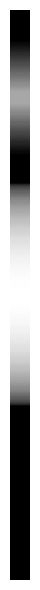

In [162]:
theta_index = 45
column = sinogram[:, theta_index]  # shape (N,)

# Repeat the column to make a visible image (e.g. 20 pixels wide)
projection_img = np.tile(column[:, np.newaxis], (1, 20))  # shape (N, 20)

plt.figure(figsize=(0.5, 6), facecolor='white')  # Aspect ratio = tall
plt.axis("off")
plt.imshow(
    projection_img,
    cmap='gray',
    aspect='auto',
    origin='lower',  # flip to 'upper' if needed
    extent=(44.5, 45.5, 0, len(column)),
    interpolation='none'  # IMPORTANT: preserve hard pixel edges
)
plt.tight_layout()
plt.savefig(save_here + "45_line_all_object.svg", format='svg', bbox_inches='tight', pad_inches=0)
plt.savefig(save_here + "45_line_all_object.pdf", format='pdf', bbox_inches='tight', pad_inches=0)
plt.savefig(save_here + "45_line_all_object.png", format='png', bbox_inches='tight', pad_inches=0)
plt.show()